<a href="https://colab.research.google.com/github/DeepakSaiPaty/Project/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv(r"/content/healthcare-dataset-stroke-data.csv",error_bad_lines=False,engine="python")

**DATA DESCRIPTION**

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
print('Missing cells observed in Columns?',df.isnull().any().sum())

Missing cells observed in Columns? 1


In [ ]:
print('Whats the column name that has missing Values?',df.isnull().any())

Whats the column name that has missing Values? id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool


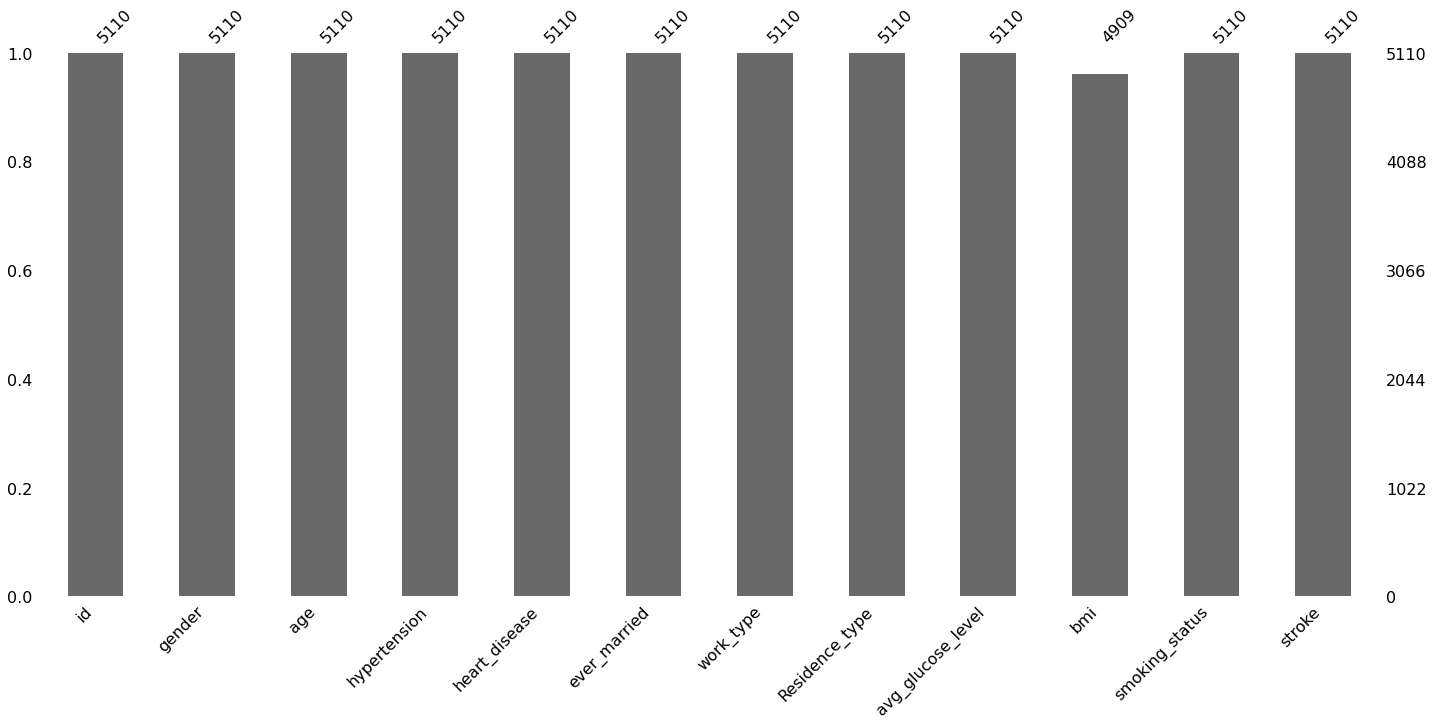

In [ ]:
import missingno as msno
p = msno.bar(df)

In [ ]:
 df['bmi'].fillna((df['bmi'].mean()), inplace=True)

In [ ]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

**DATA EXPLORATION**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


                         id       age  ...       bmi    stroke
id                 1.000000  0.003538  ...  0.002999  0.006388
age                0.003538  1.000000  ...  0.325942  0.245257
hypertension       0.003550  0.276398  ...  0.160189  0.127904
heart_disease     -0.001296  0.263796  ...  0.038899  0.134914
avg_glucose_level  0.001092  0.238171  ...  0.168751  0.131945
bmi                0.002999  0.325942  ...  1.000000  0.038947
stroke             0.006388  0.245257  ...  0.038947  1.000000

[7 rows x 7 columns]


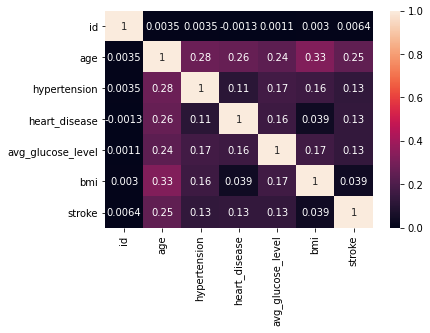

In [ ]:
corr = df.corr()
print(corr)
sns.heatmap(corr,annot=True, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

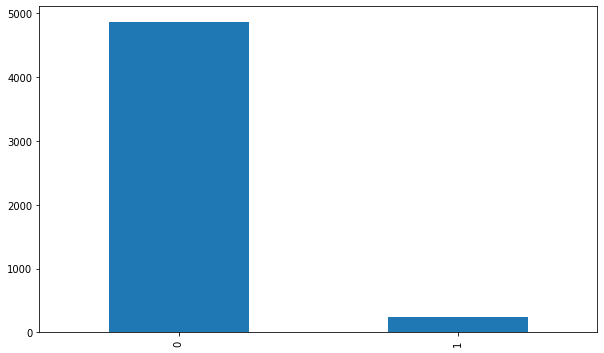

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax=df["stroke"].value_counts().plot.bar()
plt.show()

Here We can clearly see that number of people who actually got stroke are below 1000 count in the population of nearly 5000

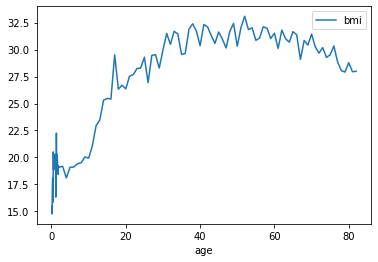

In [ ]:
eda_1=df.groupby('age', as_index=False)['bmi'].mean()
eda_1.plot(x='age',y='bmi')

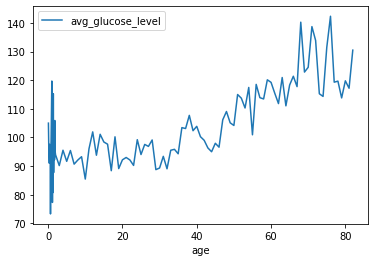

In [ ]:
eda_2=df.groupby('age', as_index=False)['avg_glucose_level'].mean()
eda_2.plot(x='age',y='avg_glucose_level')

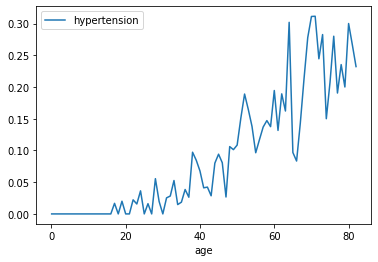

In [ ]:
eda_3=df.groupby('age', as_index=False)['hypertension'].mean()
eda_3.plot(x='age',y='hypertension')

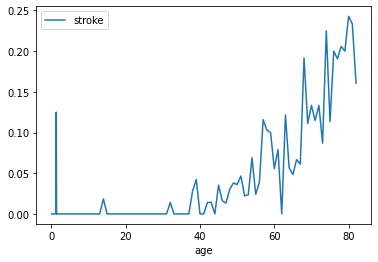

In [ ]:
eda_4=df.groupby('age', as_index=False)['stroke'].mean()
eda_4.plot(x='age',y='stroke')

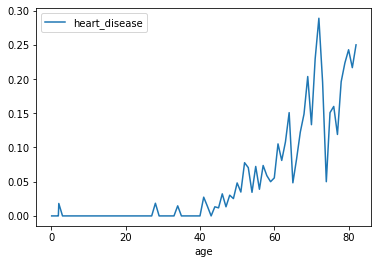

In [ ]:
eda_5=df.groupby('age', as_index=False)['heart_disease'].mean()
eda_5.plot(x='age',y='heart_disease')

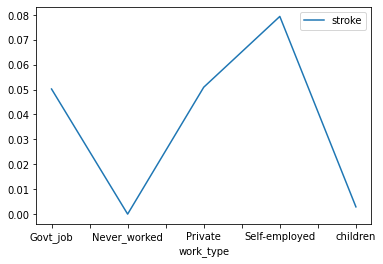

In [ ]:
eda_6=df.groupby('work_type', as_index=False)['stroke'].mean()
eda_6.plot(x='work_type',y='stroke')

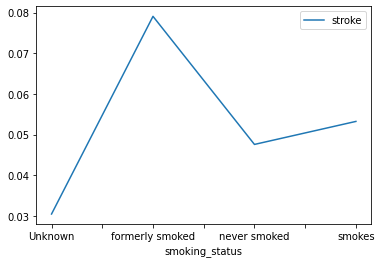

In [ ]:
eda_6=df.groupby('smoking_status', as_index=False)['stroke'].mean()
eda_6.plot(x='smoking_status',y='stroke')


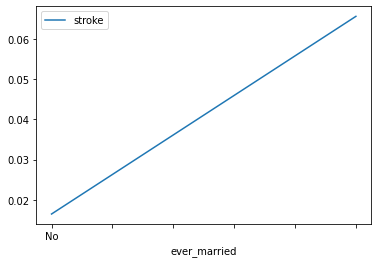

In [ ]:
eda_7=df.groupby('ever_married', as_index=False)['stroke'].mean()
eda_7.plot(x='ever_married',y='stroke')

Now, Lets make a Hypotheses,

**Hypotheses-1**

Ho= The average BMI of the persons effected with stroke is equal to 35. (H0=35)

H1= The average BMI of the persons effected with stroke is not  equal to 35. (H1!=35)

(We know that alternative hypothese always contradicts the Null hypotheses. Now lets try to prove one of the assumptions.)

**Parameters chosen:**

**Level of Significance: **

This is basically the level in which we accept or reject a hypotheses. As 100% accuracy is not possible we choose LOS as 5%.

In [ ]:
hypo=df.loc[df['stroke'] == 1] #Here I have considered the people which are effected with stroke initially
hypo=hypo[['bmi','stroke']]

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np
stroke_bmi_mean = np.mean(hypo['bmi'])
print('Actual average bmi of persons effected with stroke:',stroke_bmi_mean)
print('Null hypotheses assumption value is:',35)
tset, pval = ttest_1samp(hypo['bmi'],35)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

Actual average bmi of persons effected with stroke: 30.217789062135694
Null hypotheses assumption value is: 35
p-values 1.1745450222819894e-29
 we are rejecting null hypothesis


**Hypotheses-2**

Ho= The average age of the people effected with stroke is equal to 40 (H0=40)

H1= The average age of the people effected with stroke is not equal to 40 . (H1!=40)

In [ ]:
hypo=df.loc[df['stroke'] == 1]
hypo=hypo[['age','stroke']]
stroke_age_mean = np.mean(hypo['age'])
print('Actual average age of persons effected with stroke::', str(int(stroke_age_mean))+' Years')
print('Null hypotheses assumption value is:',str('40 Years'))
tset, pval = ttest_1samp(hypo['age'],40)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

Actual average age of persons effected with stroke:: 67 Years
Null hypotheses assumption value is: 40 Years
p-values 2.519569240149779e-96
 we are rejecting null hypothesis


**Data Preprocessing**

In [ ]:
def Encoding(df):
  test=df
  for i in list_to_encode:
    one_hot = pd.get_dummies(df[i])
# Drop column B as it is now encoded
    df = df.drop(i,axis = 1)
# Join the encoded df
    df = df.join(one_hot)
  return test,df


In [ ]:
list_to_encode=['gender','ever_married','work_type','Residence_type','smoking_status']
test,df=Encoding(df)

**MODEL** **IMPLEMENTATION**

In [ ]:
#df=df[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]
X = df.drop('stroke', axis = 1)
y = df['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
print(accuracy_score(SVC_prediction, y_test)*100)

95.04240052185257


PREDICTION USING SVM 

In [ ]:
test_record=pd.DataFrame(data=[25000,'Female',62,1,1,'Yes','Self-employed','Urban',230,40,'formerly smoked'])
test.append(test_record, ignore_index=True)
test=test.drop(['stroke'],axis=1)
dummy,test_Encoded=Encoding(test)
df2 = test_Encoded.tail(1)
if (SVC_model.predict(df2)[0]==0):
  print('No chance of Stroke')
else: 
  print('Chance of Stroke')

No chance of Stroke


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(accuracy_score(y_pred, y_test)*100)

91.65035877364645


PREDICTION USING DECISION TREE 

In [ ]:
rec_pred=clf.predict(df2)
print('****Using Descision Tree Classifier****')
print('Prediction for the given values of the patient:')
if (rec_pred==0):
  print('No chance of Stroke')
else: 
  print('Chance of Stroke')

****Using Descision Tree Classifier****
Prediction for the given values of the patient:
No chance of Stroke
